# RNN To Predict Apple Stock Price


## Step 1 - Data Preprocessing

### Importing Libraries

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing Dataset

In [29]:
dataset_train = pd.read_csv('AppleTrainingSet.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [30]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Structuring with 63 timesteps and 1 output
To predict next stock price (1 output) RNN looks at previous 63 financial days (timesteps in previous quarter).



In [31]:
X_train = []
y_train = []
for i in range(63, 1006):
    X_train.append(training_set_scaled[i-63:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Fitting for RNN Training


In [32]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Step 2 - Compiling & Training the RNN

### Importing Keras & Initializing the RNN

In [33]:
from keras.models import Sequential #Sequence of Layers
from keras.layers import Dense #Output Layer
from keras.layers import LSTM #LSTM Layers
from keras.layers import Dropout #Dropout Regularisation - number of neurons to ignore (dropout)

regressor = Sequential()

### Three LSTM layers with Dropout Regularisation
Dropout Regularisation: To avoid overfitting


In [34]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))  #20% dropout rate

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### RNN Output Layer

In [35]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [36]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Training RNN Using Training Set

In [37]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
30/30 [==============================] - 13s 176ms/step - loss: 0.0192
Epoch 2/100
30/30 [==============================] - 6s 191ms/step - loss: 0.0038
Epoch 3/100
30/30 [==============================] - 6s 186ms/step - loss: 0.0033
Epoch 4/100
30/30 [==============================] - 5s 156ms/step - loss: 0.0032
Epoch 5/100
30/30 [==============================] - 3s 94ms/step - loss: 0.0031
Epoch 6/100
30/30 [==============================] - 3s 93ms/step - loss: 0.0028
Epoch 7/100
30/30 [==============================] - 3s 93ms/step - loss: 0.0023
Epoch 8/100
30/30 [==============================] - 3s 96ms/step - loss: 0.0025
Epoch 9/100
30/30 [==============================] - 3s 94ms/step - loss: 0.0027
Epoch 10/100
30/30 [==============================] - 3s 94ms/step - loss: 0.0023
Epoch 11/100
30/30 [==============================] - 3s 94ms/step - loss: 0.0022
Epoch 12/100
30/30 [==============================] - 3s 95ms/step - loss: 0.0021
Epoch 13/100
30/30 [

## Step 3 - Predicting Stock Price + Visualizing Results

### Gathering Real Stock Price


In [38]:
dataset_test = pd.read_csv('AppleTestSet.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Predicting Stock Price

In [45]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 63:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(63, 315):
    X_test.append(inputs[i-63:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualizing Results
#### Predicts stock price for 2021

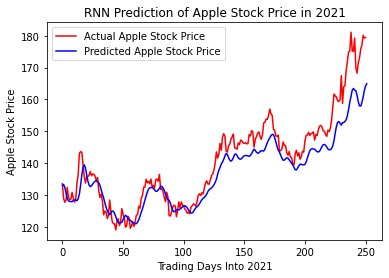

In [48]:
plt.plot(real_stock_price, color = 'red', label = 'Actual Apple Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Apple Stock Price')
plt.title('RNN Prediction of Apple Stock Price in 2021')
plt.xlabel('Trading Days Into 2021')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()